# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [280]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [281]:
tips = sns.load_dataset("tips")
# calculando a gorjeta em percentual
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['net_bill'] = tips['total_bill'] - tips['tip']

# excluindo outliers com percentual de gorjeta maior que 0.5
tips = tips[tips['tip_pct'] < 0.5]

In [282]:
reg = smf.ols('net_bill ~ tip_pct', data = tips).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:               net_bill   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     61.93
Date:                Tue, 07 May 2024   Prob (F-statistic):           1.20e-13
Time:                        01:09:17   Log-Likelihood:                -821.61
No. Observations:                 243   AIC:                             1647.
Df Residuals:                     241   BIC:                             1654.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.3261      1.529     18.528      0.0

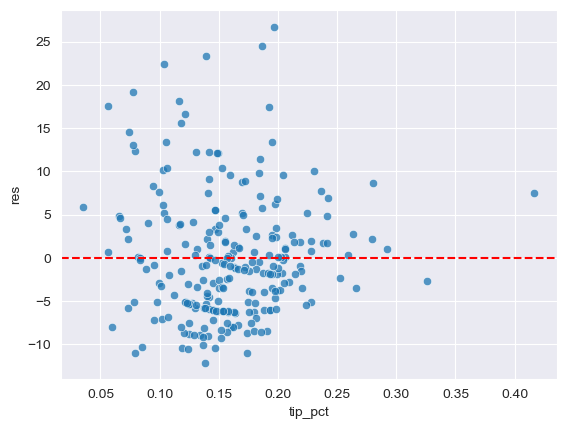

In [283]:
tips['res'] = reg.resid
sns.scatterplot(x = 'tip_pct', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

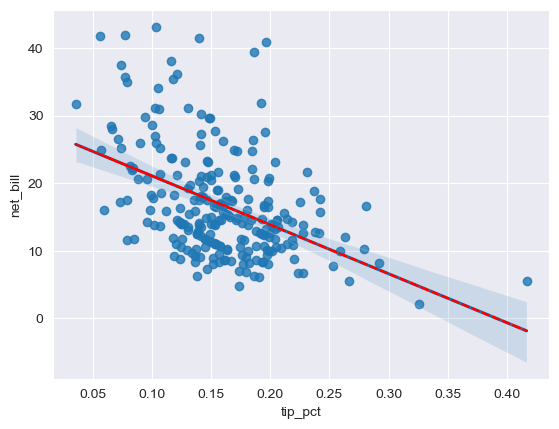

In [284]:
sns.regplot(x = 'tip_pct', y = 'net_bill', data = tips)
plt.plot(tips['tip_pct'], reg.fittedvalues, 'r,--')

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

In [285]:
reg = smf.ols('net_bill ~ np.log(tip_pct+.01)', data = tips).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:               net_bill   R-squared:                       0.233
Model:                            OLS   Adj. R-squared:                  0.229
Method:                 Least Squares   F-statistic:                     73.05
Date:                Tue, 07 May 2024   Prob (F-statistic):           1.47e-15
Time:                        01:09:18   Log-Likelihood:                -817.23
No. Observations:                 243   AIC:                             1638.
Df Residuals:                     241   BIC:                             1645.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -5.75

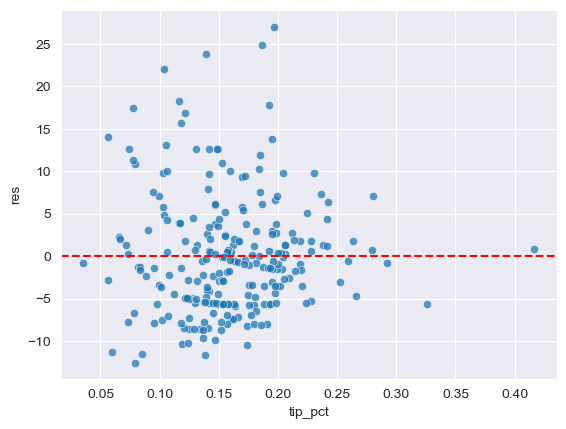

In [286]:
tips['res'] = reg.resid
sns.scatterplot(x = 'tip_pct', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

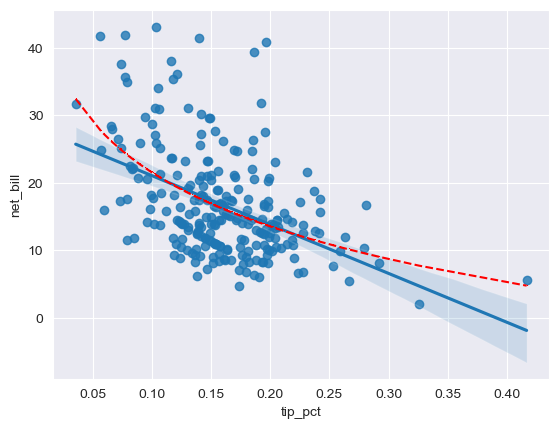

In [287]:
sns.regplot(x = 'tip_pct', y = 'net_bill', data = tips)

# pegando os valores ajustados
tips['pred'] = reg.fittedvalues
tips = tips.sort_values('tip_pct')

plt.plot(tips['tip_pct'], tips['pred'], 'r,--')

###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

In [288]:
reg = smf.ols('net_bill ~ tip_pct + np.power(tip_pct,2)', data = tips).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:               net_bill   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     35.03
Date:                Tue, 07 May 2024   Prob (F-statistic):           4.47e-14
Time:                        01:09:18   Log-Likelihood:                -818.28
No. Observations:                 243   AIC:                             1643.
Df Residuals:                     240   BIC:                             1653.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               34.9270 

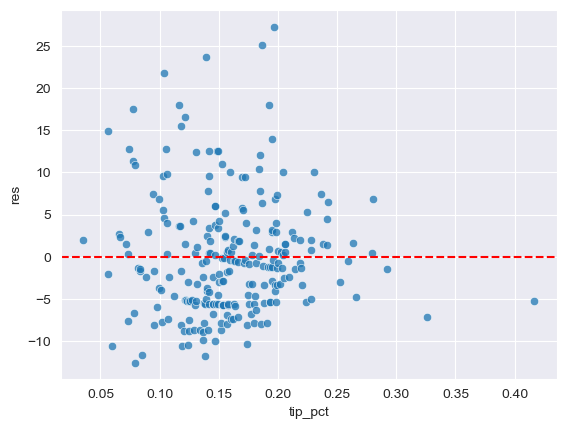

In [289]:
tips['res'] = reg.resid

sns.scatterplot(x = 'tip_pct', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')

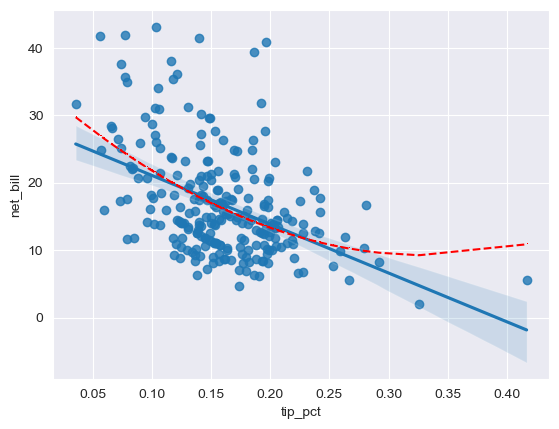

In [290]:
sns.regplot(x = 'tip_pct', y = 'net_bill', data = tips)

# pegando os valores ajustados
tips['pred'] = reg.fittedvalues
tips = tips.sort_values('tip_pct')
# corrigindo plot com várias linhas
plt.plot(tips['tip_pct'], tips['pred'], 'r,--')


###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

In [291]:
reg = smf.ols('np.log(tip_pct+.1) ~ net_bill', data = tips).fit()
print(reg.summary())

                             OLS Regression Results                             
Dep. Variable:     np.log(tip_pct + .1)   R-squared:                       0.225
Model:                              OLS   Adj. R-squared:                  0.222
Method:                   Least Squares   F-statistic:                     69.90
Date:                  Tue, 07 May 2024   Prob (F-statistic):           5.02e-15
Time:                          01:09:19   Log-Likelihood:                 87.016
No. Observations:                   243   AIC:                            -170.0
Df Residuals:                       241   BIC:                            -163.0
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1786      0.025

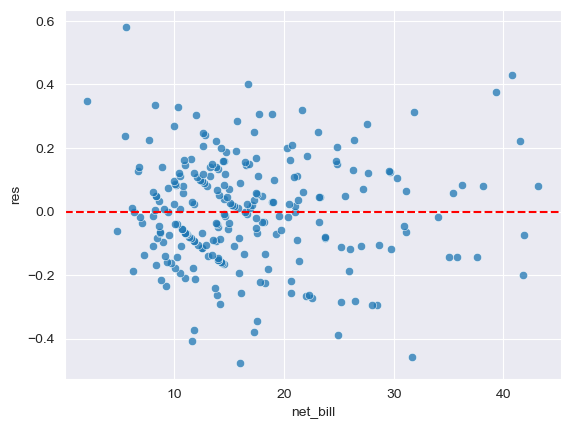

In [292]:
tips['res'] = reg.resid
sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')


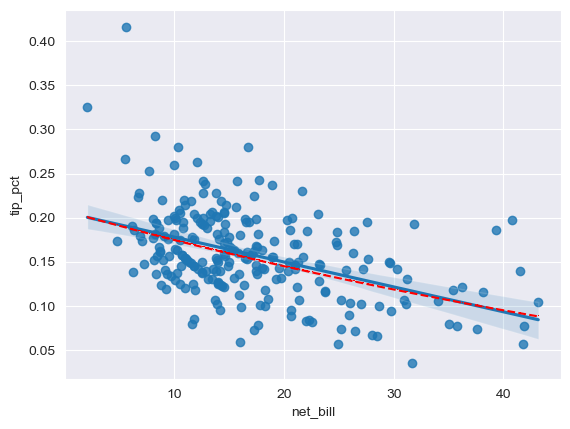

In [293]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)

# pegando os valores ajustados
tips['pred'] = reg.fittedvalues
tips['pred_original_scale'] = np.exp(tips['pred']) - 0.1
tips = tips.sort_values('net_bill')

plt.plot(tips['net_bill'], tips['pred_original_scale'], 'r,--')


In [294]:
# imprimindo o R2
print(reg.rsquared)
r = tips[['tip_pct', 'pred_original_scale']].corr().iloc[0,1]
r**2

0.2248288489539888


0.21156963890949265

###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

In [295]:
reg = smf.ols('np.log(tip_pct+.1) ~ np.log(net_bill+.1)', data = tips).fit()
print(reg.summary())

                             OLS Regression Results                             
Dep. Variable:     np.log(tip_pct + .1)   R-squared:                       0.243
Model:                              OLS   Adj. R-squared:                  0.240
Method:                   Least Squares   F-statistic:                     77.25
Date:                  Tue, 07 May 2024   Prob (F-statistic):           2.89e-16
Time:                          01:09:19   Log-Likelihood:                 89.857
No. Observations:                   243   AIC:                            -175.7
Df Residuals:                       241   BIC:                            -168.7
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept 

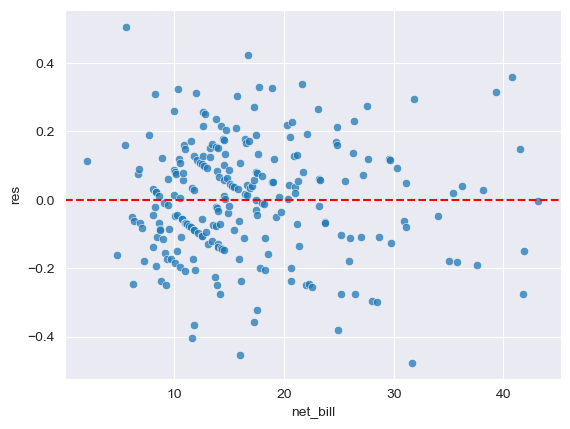

In [296]:
tips['res'] = reg.resid

sns.scatterplot(x = 'net_bill', y = 'res', data = tips, alpha = .75)
plt.axhline(y=0, color='r', linestyle='--')


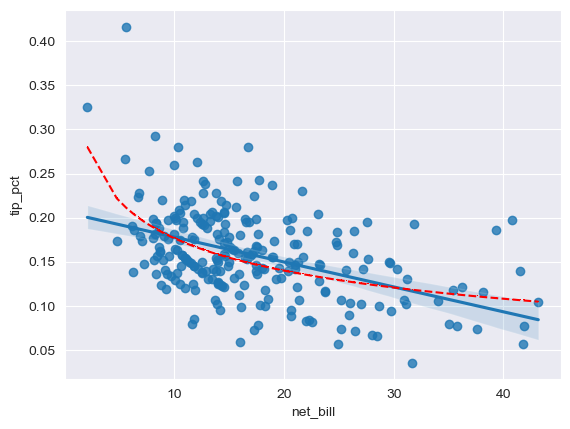

In [297]:
sns.regplot(x = 'net_bill', y = 'tip_pct', data = tips)

# pegando os valores ajustados
tips['pred'] = reg.fittedvalues
tips['pred_original_scale'] = np.exp(tips['pred']) - 0.1

tips = tips.sort_values('net_bill')

plt.plot(tips['net_bill'], tips['pred_original_scale'], 'r,--')


In [298]:

# imprimindo o R2
print(reg.rsquared)

# calculando o R2 com correlação
r = tips[['tip_pct', 'pred_original_scale']].corr().iloc[0,1]
r**2


0.24274011351862634


0.24213290885054314

###  6. qual modelo resultou no melhor ajuste?

In [57]:
# O modelo que resultou no melhor ajuste foi o modelo 5, que ajusta o log do tip_pct em função do log do net_bill.